In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:27<00:00, 60.3MB/s]
100% 2.29G/2.29G [00:27<00:00, 89.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)
validation_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)


Found 624 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
# Normalization [0-255 ----0-1]
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
#Data Argumentation to reduce Overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size =32
train_datagen =  ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/chest_xray/train',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    '/content/chest_xray/val',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
#CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding= 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size =(3,3),padding= 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size =(3,3),padding= 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size =(3,3),padding= 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds,epochs = 25,validation_data=validation_ds)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 602ms/step - accuracy: 0.6167 - loss: 4.0792 - val_accuracy: 0.6250 - val_loss: 3.8076
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 412ms/step - accuracy: 0.7771 - loss: 1.8629 - val_accuracy: 0.6250 - val_loss: 5.9918
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.7732 - loss: 1.5207 - val_accuracy: 0.6250 - val_loss: 13.4913
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 293ms/step - accuracy: 0.8134 - loss: 1.0162 - val_accuracy: 0.6250 - val_loss: 5.6877
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 412ms/step - accuracy: 0.8303 - loss: 0.5254 - val_accuracy: 0.6250 - val_loss: 5.2043
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.7892 - loss: 0.4754 - val_accuracy: 0.6250 - val_loss: 8.1667
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 344ms/step - accuracy: 0.8047 - loss: 0.4159 - val_accuracy: 0.6250 - val_loss: 13.6516
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 294ms/step - accuracy: 0.8534 - loss: 0.4188 - val_accura

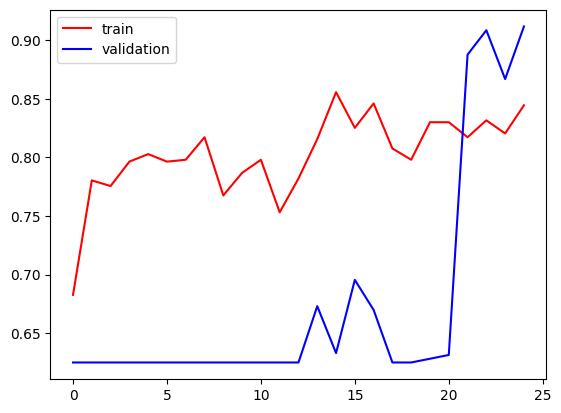

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

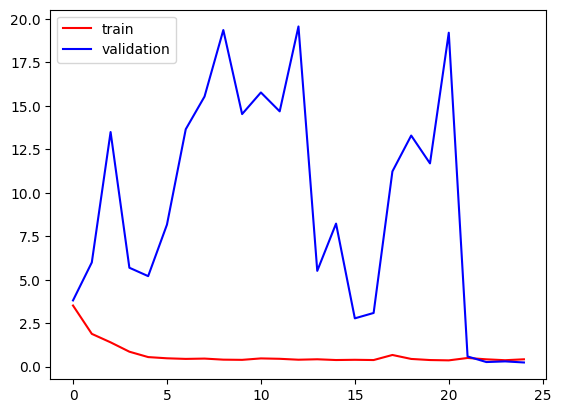

In [ ]:
plt.plot(history.history['loss'],color = 'red',label='train')
plt.plot(history.history['val_loss'],color = 'blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img =cv2.imread('/content/chest.jpg')

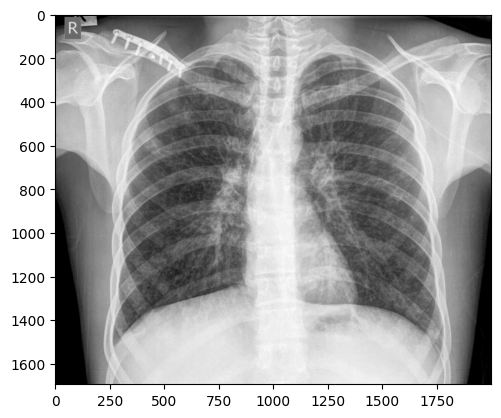

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1694, 2000, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input =test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step


array([[0.]], dtype=float32)